In [8]:
import pandas
from scipy import stats
import seaborn

# Úkol-02

### Inflace
Ověř, zda se procento lidí, kteří řadí inflaci mezi 2 své nejzávažnější problémy, změnilo.

Všechny státy

sloupce: 98=léto 2022; 97=zima 2022/2023

In [3]:
data_inflace = pandas.read_csv("ukol_02_a.csv")
data_inflace.head()

,Country,98,97
0,BE,31,34
1,BG,22,31
2,CZ,34,42
3,DK,28,33
4,D-W,33,40


1. Test normality dat: Shapiro-Wilk test

H0: Data mají normální rozdělení.
H1: Data nemají normální rozdělení.

In [6]:
res_98 = stats.shapiro(data_inflace["98"])
res_97 = stats.shapiro(data_inflace["97"])
print(res_98)
print(res_97)

ShapiroResult(statistic=0.9803104996681213, pvalue=0.687289297580719)
ShapiroResult(statistic=0.9694532752037048, pvalue=0.33090925216674805)


sloupec 98: pvalue=0.687289297580719

sloupec 97: pvalue=0.33090925216674805

pvalue > 0,05: Nezamítáme H0, předpokládáme, že obě sady dat mají normální rozdělení a můžeme použít parametrické testy.

2. Formulace hypotéz

H0: Procento lidí, kteří řadí inflaci mezi své 2 nejzávažnější problémy se nezměnilo. (98=97)

H1: Procento lidí, kteří řadí inflaci mezi své 2 nejzávažnější problemy se změnilo. (98!=97)

3. Výběr vhodného testu

Parametrický párový test: párový t-test

In [5]:
res = stats.ttest_rel(data_inflace["98"], data_inflace["97"])
res

TtestResult(statistic=-3.868878598419143, pvalue=0.0003938172257904746, df=40)

4. Formulace výsledku na základě p hodnoty:

p hodnota < 0,05: zamítáme H0 a tvrdíme, že platí H1. Tedy: Procento lidí, kteří řadí inflaci mezi své 2 nejzávažnější problémy se změnilo.

### Důvěra ve stát a v EU

Ověř, zda existuje korelace mezi procentem lidí, které věří EU a procentem lidí, kteří věří své národní vládě.

In [28]:
data_duvera = pandas.read_csv("ukol_02_b.csv")
data_duvera.head()

,Country,National Government Trust,EU Trust
0,BE,40,55
1,BG,19,49
2,CZ,30,43
3,DK,52,65
4,D-W,54,53


In [11]:
staty = pandas.read_csv("countries.csv")
staty.head()

,Country Name,Country,Euro
0,Belgium,BE,1
1,Greece,EL,1
2,Lithuania,LT,1
3,Portugal,PT,1
4,Bulgaria,BG,0


In [17]:
data_EU = pandas.merge(data_duvera, staty, on=["Country"], how="left")
data_EU = data_EU.dropna()
data_EU

,Country,National Government Trust,EU Trust,Country Name,Euro
0,BE,40,55,Belgium,1.0
1,BG,19,49,Bulgaria,0.0
2,CZ,30,43,Czechia,0.0
3,DK,52,65,Denmark,0.0
5,DE,49,49,Germany,1.0
7,EE,39,48,Estonia,0.0
8,IE,46,58,Ireland,1.0
9,EL,22,37,Greece,1.0
10,ES,23,50,Spain,1.0
11,FR,23,34,France,1.0


1. Test normality obou skupin dat

In [18]:
res_national = stats.shapiro(data_EU["National Government Trust"])
res_EU = stats.shapiro(data_EU["EU Trust"])
print(res_national)
print(res_EU)

ShapiroResult(statistic=0.9438267350196838, pvalue=0.15140558779239655)
ShapiroResult(statistic=0.9735807180404663, pvalue=0.6981646418571472)


V obou případech je pvalue > 0,05: Nezamítáme H0, předpokládáme, že obě sady dat mají normální rozdělení a můžeme použít parametrické testy.

2. Formulace hypotéz

H0: Procento lidí, kteří věří EU a procento lidí, kteří věří své národní vládě jsou nezávislé. (r=0)

H1: Procento lidí, kteří věří EU a procento lidí, kteří věří své národní vládě jsou závislé. (r!=0)

3. Volba testu

Data mají normální rozdělení, takže můžeme použít test založený na Pearsonově korelačním koeficientu

In [19]:
res = stats.pearsonr(data_EU["EU Trust"], data_EU["National Government Trust"])
res

PearsonRResult(statistic=0.6097186340024556, pvalue=0.0007345896228823406)

statistic=0.6097186340024556 - korelační koeficient značí, že zde existuje pozitivní závislost, t. j. čím víc lidi věří své národní vládě, tím víc věří EU

pvalue=0.0007345896228823406 - pvalue < 0,05, takže zamítáme H0 a tvrdíme, že platí H1. Procento lidí, kteří věří EU koreluje s procentem lidí, kteří věří své národní vládě.

Výsledky můžeme zobrazit na korelačním diagramu

<AxesSubplot: xlabel='National Government Trust', ylabel='EU Trust'>

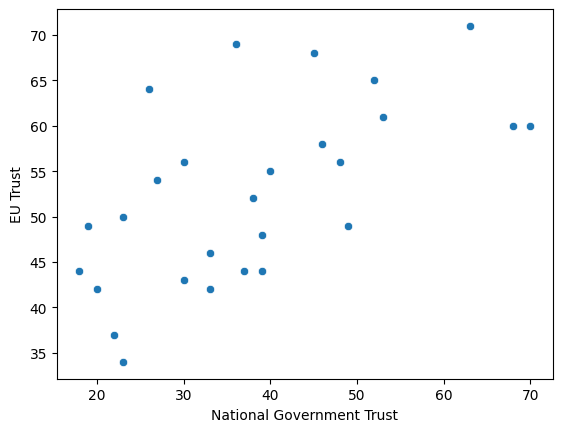

In [20]:
seaborn.scatterplot(data=data_EU, x="National Government Trust", y="EU Trust")

### Důvěra v EU a euro

Nakonec si rozdělíme státy EU na dvě skupiny - státy v eurozóně a státy mimo ni. Jak je to s důvěrou v EU? Důvěřují EU více lidé, kteří žijí ve státech platící eurem? Využij znovu data o důvěře v EU ze souboru ukol_02_b.csv a rozděl státy na ty, které jsou v eurozóně, a ty, které jsou mimo ni. Porovnej, jak se liší důvěra v EU v těchto dvou skupinách zemí. Státy můžeš rozdělit s využitím tabulky v souboru countries.csv.

In [21]:
eurozona = data_EU[data_EU["Euro"] == 1.0]
eurozona

,Country,National Government Trust,EU Trust,Country Name,Euro
0,BE,40,55,Belgium,1.0
5,DE,49,49,Germany,1.0
8,IE,46,58,Ireland,1.0
9,EL,22,37,Greece,1.0
10,ES,23,50,Spain,1.0
11,FR,23,34,France,1.0
13,IT,33,46,Italy,1.0
14,CY,33,42,Cyprus,1.0
15,LV,30,56,Latvia,1.0
16,LT,36,69,Lithuania,1.0


In [22]:
ne_eurozona = data_EU[data_EU["Euro"] == 0]
ne_eurozona

,Country,National Government Trust,EU Trust,Country Name,Euro
1,BG,19,49,Bulgaria,0.0
2,CZ,30,43,Czechia,0.0
3,DK,52,65,Denmark,0.0
7,EE,39,48,Estonia,0.0
12,HR,20,42,Croatia,0.0
18,HU,48,56,Hungary,0.0
22,PL,26,64,Poland,0.0
24,RO,27,54,Romania,0.0
28,SE,53,61,Sweden,0.0


1. Formulace hypotéz

H0: Důvěra v EU se neliší v zemích eurozóny a mimo ni.

H1: Důvěra v EU se liší v zemích eurozóny a mimo ni.

2. Volba testu

Nepárový t-test



In [27]:
res = stats.ttest_ind(eurozona["EU Trust"], ne_eurozona["EU Trust"])
res

Ttest_indResult(statistic=-0.33471431258258433, pvalue=0.7406326832748829)

pvalue=0.7406326832748829, t.j. > 0,05, takže nezamítáme H0 a nelze potvrdit, že by to, zda stát je nebo není v Eurozóně mělo vliv na důvěru v EU.